<a href="https://colab.research.google.com/github/dhamwarich/nitrous.digital/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the dataset: (506, 14)

First few rows:
         0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  

Summary statistics:
                0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      

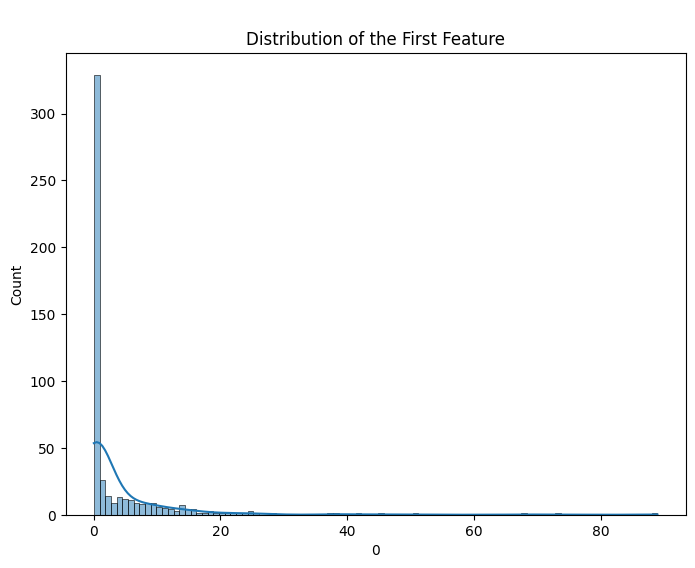

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
housing_data = pd.read_csv("housing.csv", header=None, sep=r'\s+')

# Check the shape of the dataset
print("Shape of the dataset:", housing_data.shape)

# Display the first few rows
print("\nFirst few rows:\n", housing_data.head())

# Get summary statistics
print("\nSummary statistics:\n", housing_data.describe())

# Check for missing values
print("\nMissing values:\n", housing_data.isnull().sum())

# Visualize the distribution of a numerical feature
plt.figure(figsize=(8, 6))
sns.histplot(data=housing_data, x=housing_data.columns[0], kde=True)
plt.title("\nDistribution of the First Feature")
plt.show()

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Separate the target variable (assuming it's the last column)
X = housing_data.iloc[:, :-1]  # Features
y = housing_data.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of testing set:", X_test.shape, y_test.shape)

Shape of training set: (404, 13) (404,)
Shape of testing set: (102, 13) (102,)


In [9]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
lr_model = LinearRegression()

# Create a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the linear regression model
lr_model.fit(X_train, y_train)

# Train the random forest regression model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
print("Linear Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R-squared:", r2_score(y_test, y_pred_lr))

print("\nRandom Forest Regression Model:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R-squared:", r2_score(y_test, y_pred_rf))

Linear Regression Model:
Mean Squared Error: 24.291119474973478
R-squared: 0.6687594935356326

Random Forest Regression Model:
Mean Squared Error: 7.901513892156864
R-squared: 0.8922527442109116


Results:
                      Model  Mean Squared Error  R-squared
0         Linear Regression           24.291119   0.668759
1  Random Forest Regression            7.901514   0.892253

Feature Importance Scores (Random Forest Regression):
1. 5 (0.503845)
2. 12 (0.309509)
3. 7 (0.060549)
4. 0 (0.038062)
5. 10 (0.016313)
6. 9 (0.015661)
7. 4 (0.015544)
8. 6 (0.013840)
9. 11 (0.012154)
10. 2 (0.007953)
11. 8 (0.003811)
12. 1 (0.001756)
13. 3 (0.001004)


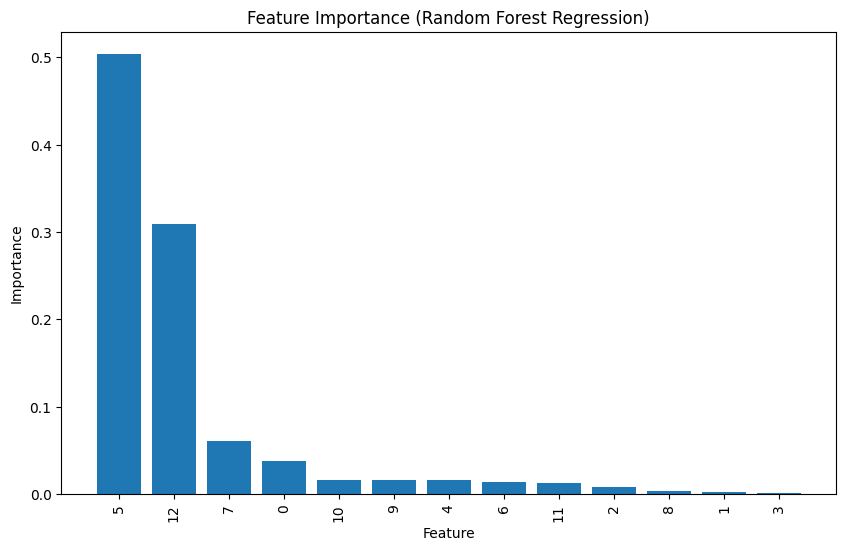

In [12]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regression'],
    'Mean Squared Error': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_rf)],
    'R-squared': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
})

# Print the results table
print("Results:")
print(results)

# Analyze feature importance for the Random Forest Regression model
if hasattr(rf_model, 'feature_importances_'):
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature importance scores
    print("\nFeature Importance Scores (Random Forest Regression):")
    for f in range(X_train.shape[1]):
        print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

    # Plot the feature importance scores
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Feature Importance (Random Forest Regression)')
    plt.show()